# Naive Bayes Classifier
Christiaan van Roon - 11122854
Sander Hansen - 10995080

+ *Write a section in which you start with the Bayes Classifier for this problem using the symbols (X,L,W and S) that are introduced in this exercise and end with the formula for the naive Bayesian classifier.*
 
 First we will write down the Bayesian classifier.

  $$P(X=0\ |\ L=l, W=w, S=s) \geq P(X=1\ |\ L=l, W=w, S=s)$$
  
 Using Bayes rule we can write: (for continuous variables)
 
 $$fL_1,W_1,S_1...L_n,W_n,S_n|X=x(L_1,W_1,S_1...L_n,W_n,S_n)P(X=x)$$
 
 We left out the denominator cause it will be the same for both men and woman, so it will have no use. We can rewrite this to:
 
 $$P(X=x)\prod_{i=1}^{n} f_{L_i,W_i,S_i\ |\ X=x}(L_i,W_i,S_i)$$
 
 
   

+ *Estimate the parameters of the six normal distributions that are needed for classification. Give all parameters in a table in your report. And plot the conditional probability density functions. For each random variable plot the pdf for both female and male in one plot.*

  First we will estemate $\mu$ and $\sigma$.

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

length_m = np.empty(0, dtype=float)
weight_m = np.empty(0)
shoe_size_m = np.empty(0)

length_f = np.empty(0)
weight_f = np.empty(0)
shoe_size_f = np.empty(0)

with open('data.csv', 'r') as file:
    data = csv.reader(file, delimiter=',')
    for row in data:  
        if row[0] == "M ":
            length_m = np.append(length_m, float(row[2]))
            weight_m = np.append(weight_m, float(row[1]))
            shoe_size_m = np.append(shoe_size_m, float(row[3]))
        elif row[0] == "F":
            length_f = np.append(length_f, float(row[2]))
            weight_f = np.append(weight_f, float(row[1]))
            shoe_size_f = np.append(shoe_size_f, float(row[3]))


            
length_mu_m = np.mean(length_m)
weight_mu_m = np.mean(weight_m)
shoe_size_mu_m = np.mean(shoe_size_m)
length_mu_f = np.mean(length_f)
weight_mu_f = np.mean(weight_f)
shoe_size_mu_f = np.mean(shoe_size_f)

length_sig_m = np.sqrt(np.var(length_m))
weight_sig_m = np.sqrt(np.var(weight_m))
shoe_size_sig_m = np.sqrt(np.var(shoe_size_m))
length_sig_f = np.sqrt(np.var(length_f))
weight_sig_f = np.sqrt(np.var(weight_f))
shoe_size_sig_f = np.sqrt(np.var(shoe_size_f))

print("Male table")
print("\t\tMu \t\tSigma")
print("Length \t\t%f\t%f" %(length_mu_m, length_sig_m))
print("Weight \t\t%f\t%f" %(weight_mu_m, weight_sig_m))
print("Shoe Size \t%f\t%f" %(shoe_size_mu_m, shoe_size_sig_m))

print("\nFemale table")
print("\t\tMu \t\tSigma")
print("Length \t\t%f\t%f" %(length_mu_f, length_sig_f))
print("Weight \t\t%f\t%f" %(weight_mu_f, weight_sig_f))
print("Shoe Size \t%f\t%f" %(shoe_size_mu_f, shoe_size_sig_f))

Male table
		Mu 		Sigma
Length 		184.074074	6.103587
Weight 		76.592593	13.784745
Shoe Size 	43.492593	1.235861

Female table
		Mu 		Sigma
Length 		169.000000	6.164414
Weight 		61.000000	13.589211
Shoe Size 	38.666667	2.134375


Then we can plot the probability density functions. We will use our functions from last week to achieve this.

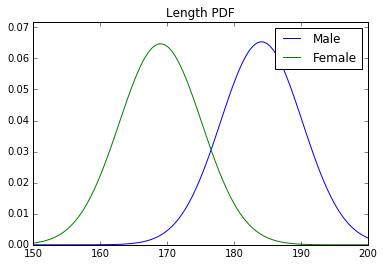

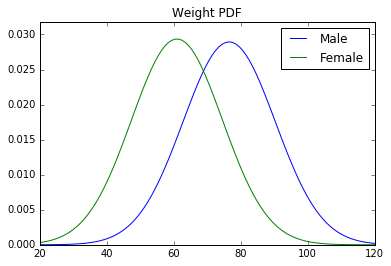

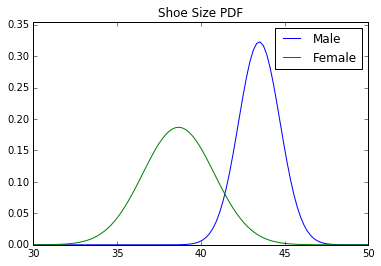

In [2]:
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi)) * 
            np.e**(-1*((x - mu)**2)/(2*sigma**2)))

length_x = np.linspace(150, 200, num=100)
weight_x = np.linspace(20, 120, num=100)
shoe_size_x = np.linspace(30, 50, num=100)

length_y_m = normal_pdf(length_x, length_mu_m, length_sig_m)
weight_y_m = normal_pdf(weight_x, weight_mu_m, weight_sig_m)
shoe_size_y_m = normal_pdf(shoe_size_x, shoe_size_mu_m, shoe_size_sig_m)
length_y_f = normal_pdf(length_x, length_mu_f, length_sig_f)
weight_y_f = normal_pdf(weight_x, weight_mu_f, weight_sig_f)
shoe_size_y_f = normal_pdf(shoe_size_x, shoe_size_mu_f, shoe_size_sig_f)

plt.plot(length_x,length_y_m)
plt.plot(length_x, length_y_f)
plt.legend(["Male", "Female"])
plt.axis([150, 200, 0, (np.amax(length_y_m) * 1.1)])
plt.title('Length PDF')
plt.show()

plt.plot(weight_x,weight_y_m)
plt.plot(weight_x, weight_y_f)
plt.legend(["Male", "Female"])
plt.axis([20, 120, 0, (np.amax(weight_y_m) * 1.1)])
plt.title('Weight PDF')
plt.show()

plt.plot(shoe_size_x,shoe_size_y_m)
plt.plot(shoe_size_x, shoe_size_y_f)
plt.legend(["Male", "Female"])
plt.axis([30, 50, 0, (np.amax(shoe_size_y_m) * 1.1)])
plt.title('Shoe Size PDF')
plt.show()


+ *Test your classifier on the same data that is used to learn. Yes, this is a big no-no in machine learning! For this first example of a machine learning algorithm we make an exception. Present the results in a confusion matrix (see Wikipedia for the definition).*

  Herefor we need to implement the classification first.

In [3]:
def bayes(W, W_mu_m, W_sigma_m, W_mu_f, W_sigma_f, L, L_mu_m, 
          L_sigma_m, L_mu_f, L_sigma_f, S, S_mu_m, S_sigma_m,
          S_mu_f, S_sigma_f,):
    prob_m = (0.5 * normal_pdf(W, W_mu_m, W_sigma_m) * 
             normal_pdf(L, L_mu_m, L_sigma_m) * 
             normal_pdf(S, S_mu_m, S_sigma_m))

    prob_f = (0.5 * normal_pdf(W, W_mu_f, W_sigma_f) * 
             normal_pdf(L, L_mu_f, L_sigma_f) * 
             normal_pdf(S, S_mu_f, S_sigma_f))

    if prob_m > prob_f:
        return 0
    else:    
        return 1

Then we can test it on our data;

In [4]:
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0

for i in enumerate(weight_m):
    if bayes(weight_m[i[0]], weight_mu_m, weight_sig_m, weight_mu_f,
             weight_sig_f, length_m[i[0]], length_mu_m, 
             length_sig_m, length_mu_f, length_sig_f, 
             shoe_size_m[i[0]], shoe_size_mu_m, shoe_size_sig_m,
             shoe_size_mu_f, shoe_size_sig_f) == 0:
        true_neg += 1
    else:
        false_pos += 1

for i in enumerate(length_f):
    if bayes(weight_f[i[0]], weight_mu_m, weight_sig_m, weight_mu_f,
             weight_sig_f, length_f[i[0]], length_mu_m, 
             length_sig_m, length_mu_f, length_sig_f, 
             shoe_size_f[i[0]], shoe_size_mu_m, shoe_size_sig_m,
             shoe_size_mu_f, shoe_size_sig_f) == 1:
        true_pos += 1      
    else:
        false_neg += 1
print("\t\tPredicted Woman\t\tPredicted Men")  
print("Actual Woman\t%d\t\t\t%d"%(true_pos, false_neg))
print("Actual Men\t%d\t\t\t%d"%(false_pos, true_neg))
    

		Predicted Woman		Predicted Men
Actual Woman	5			1
Actual Men	1			26
